# Biblical generative model

Hyperparameters:
```plaintext
Hyperparameters(vocab_size=7000, n_feedforward=448, n_encoder_layer=3, n_decoder_layer=3, n_head=7, n_embd=448, dropout=0.1, bias=False, epochs=50, batch_size=24, optimizer={'lr': 0.0001, 'betas': (0.9, 0.98), 'eps': 1e-09}, scheduler={'decay_lr': True, 'warmup': 100, 'max': 5000, 'min_lr': 0.0001}, weight_decay=0.1, grad_clip=1.0, output_path='./output/', data_path='./data/bible_qa.txt', tokenizer={'path': None, 'bpe_path': './bible.model', 'k': None, 'special_symbols': {'[PAD]': 256, '[CLS]': 257, '[SEP]': 258}, 'vocab_size': 7000, 'tokenizer': None}, loss_fn=CrossEntropyLoss())
```

Transformer architecture:
```plaintext
Transformer(
  (transformer): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=448, out_features=448, bias=True)
          )
          (linear1): Linear(in_features=448, out_features=448, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=448, out_features=448, bias=True)
          (norm1): LayerNorm((448,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((448,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
      (norm): LayerNorm((448,), eps=1e-05, elementwise_affine=True)
    )
    (decoder): TransformerDecoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerDecoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=448, out_features=448, bias=True)
          )
          (multihead_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=448, out_features=448, bias=True)
          )
          (linear1): Linear(in_features=448, out_features=448, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=448, out_features=448, bias=True)
          (norm1): LayerNorm((448,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((448,), eps=1e-05, elementwise_affine=True)
          (norm3): LayerNorm((448,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
          (dropout3): Dropout(p=0.1, inplace=False)
        )
      )
      (norm): LayerNorm((448,), eps=1e-05, elementwise_affine=True)
    )
  )
  (src_tok_emb): Embedding(
    (embedding): Embedding(7000, 448)
  )
  (tgt_tok_emb): Embedding(
    (embedding): Embedding(7000, 448)
  )
  (positional_encoding): PositionalEncoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (generator): Linear(in_features=448, out_features=7000, bias=True)
)
```

Vocabulary size: 7000

In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append("..")

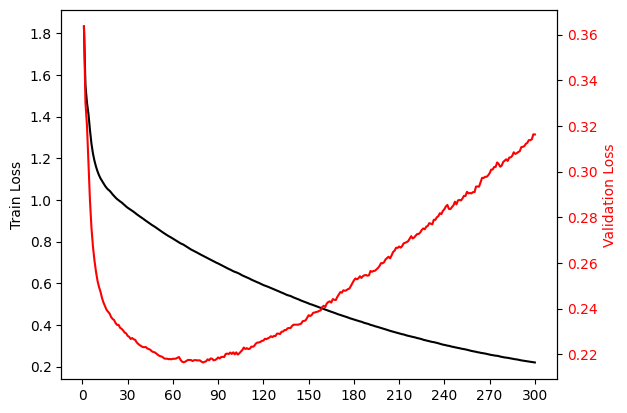

In [2]:
loss = pd.read_csv('./loss.csv', header=0, index_col=0)

fig, ax1 = plt.subplots()
ax1.plot(loss.index, loss["train_loss"], color='black')
ax1.set_ylabel('Train Loss', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(loss.index, loss["val_loss"], color='red')
ax2.set_ylabel('Validation Loss', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.xticks(range(0, max(loss.index)+1, 300//10))
plt.xlabel('Epoch')
plt.show()

In [3]:
models = {
    "90": torch.load("./model-90.pth", map_location=torch.device('cpu')),
    "120": torch.load("./model-120.pth", map_location=torch.device('cpu')),
}
for model in models.values():
    model.config.device = "cpu"

In [4]:
prompts = ["The meaning of life, is this:",]
temperatures = [0.8, 0.5]
maximum = 100
top_k = None

In [5]:
for prompt in prompts:
    print(f"\n\033[91m Prompt:\033[0m {prompt}")
    for temperature in temperatures:
        print(f"\n\033[91m Temperature:\033[0m {temperature}")
        for which, model in models.items():
            output = model(prompt, margin=maximum, temperature=temperature, top_k=top_k)
            print(f"\033[91m {which}:\033[0m {output} ...")


 Prompt: The meaning of life, is this:

 Temperature: 0.8
 90: He has done evil in deed you, that heave her; he had not a full grown old man shall not be born to him. She will cast down their sins. The Lord Yahweh has bound him for him. He is heir of death with her hands. He is swallowed up against him for her ways. He is the righteous. I have sinned against you, and hated her power over her husband. Again he doesn't know her words in her eye, for she has done only in her ...
 120: My enemy has heard a rock, and I go down into the wilderness; and I am not rented." Nevertheless I saw this, I was still alive. They came and said, "What did not the wicked, that which has spoken? For this man has not made his ways on me, and have been on those days, but truly no way for I am painted from the beginning in the end of the beginning. Hear, you if you have heard the beginning. I was a ...

 Temperature: 0.5
 90: I have made my sight for you, that you have been done for the wicked; but I have ma